## El secuestro de Bayes
Una nota de rescate fue dejada en la escena del secuestro de Bayes. Eventualmente, querremos analizar la frecuencia con la que aparece cada letra en la nota, para ayudarnos a identificar al secuestrador.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ransom = pd.read_csv('ransom.csv')
print(ransom)

    letter_index letter  frequency
0              1      A       7.38
1              2      B       1.09
2              3      C       2.46
3              4      D       4.10
4              5      E      12.84
5              6      F       1.37
6              7      G       1.09
7              8      H       3.55
8              9      I       7.65
9             10      J       0.00
10            11      K       3.01
11            12      L       3.28
12            13      M       2.46
13            14      N       7.38
14            15      O       6.83
15            16      P       7.65
16            17      Q       0.00
17            18      R       4.92
18            19      S       4.10
19            20      T       6.28
20            21      U       4.37
21            22      V       1.09
22            23      W       2.46
23            24      X       0.00
24            25      Y       4.64
25            26      Z       0.00


<function matplotlib.pyplot.show(close=None, block=None)>

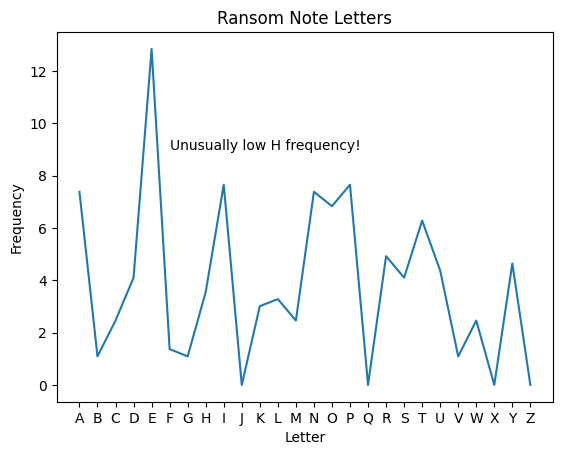

In [2]:
plt.plot(ransom['letter'], ransom['frequency'])

plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.title("Ransom Note Letters")

plt.text(5,9, "Unusually low H frequency!")

plt.show

Necesitamos reducir la lista de sospechosos del secuestro de Bayes. Una vez que tengamos una lista de sospechosos, les pediremos muestras de escritura y las compararemos con la nota de rescate.

Un testigo del crimen notó un camión verde que salía de la escena del crimen cuya placa comenzaba con 'FRQ'. Usaremos esta información para buscar algunos sospechosos.

Lista de sospechosos reducida:

- Fred Frecuentista
- Ronald Aylmer Fisher
- Gertrude Cox
- Kirstine Smith

Hemos obtenido registros de tarjetas de crédito para los cuatro sospechosos. ¿Quizás algunos de ellos hicieron compras sospechosas antes del secuestro?

Los registros están en un archivo CSV denominado "credit_records.csv"

In [3]:
credit_records = pd.read_csv('credit_records.csv')
print(credit_records.head())

            suspect         location             date         item  price
0  Fred Frequentist  Petroleum Plaza   January 1 2018          gas  24.95
1  Fred Frequentist   Groceries R Us  January 10 2018       cheese   5.00
2  Fred Frequentist  Petroleum Plaza  January 10 2018  fizzy drink   1.90
3  Fred Frequentist  Petroleum Plaza  January 11 2018      carwash  13.25
4  Fred Frequentist    Clothing Club  January 13 2018        pants  12.05


In [4]:
items = credit_records['item']
print(items)

0               gas
1            cheese
2       fizzy drink
3           carwash
4             pants
           ...     
99           burger
100    cheeseburger
101    cheeseburger
102             gas
103             gas
Name: item, Length: 104, dtype: object


In [5]:
missing_puppy_report = pd.read_csv('missing_puppy.csv')
print(missing_puppy_report)

  Dog Name             Owner Name         Dog Breed         Status  Age
0    Bayes              ArmyChris  Golden Retriever  Still Missing    1
1  Sigmoid                    NaN         Dachshund  Still Missing    2
2   Sparky             Dr. Apache     Border Collie          Found    3
3  Theorem  Joseph-Louis Lagrange    French Bulldog          Found    4
4      Ned           Tim Oliphant          Shih Tzu  Still Missing    2
5    Benny   Hillary Green-Lerman            Poodle          Found    3


Nos gustaría reducir la lista de sospechosos, por lo que obtuvimos registros de tarjetas de crédito para cada sospechoso. Nos gustaría saber si alguno de ellos compró recientemente golosinas para perros para usar en el secuestro. Si lo hicieran, habrían visitado.'Pet Paradise'

In [6]:
# Select purchases from 'Pet Paradise'
purchase = credit_records[credit_records.location == 'Pet Paradise']

# Display
print(purchase)

             suspect      location             date          item  price
8   Fred Frequentist  Pet Paradise  January 14 2018    dog treats   8.75
9   Fred Frequentist  Pet Paradise  January 14 2018    dog collar  12.25
28      Gertrude Cox  Pet Paradise  January 13 2018  dog chew toy   5.95
29      Gertrude Cox  Pet Paradise  January 13 2018    dog treats   8.75


## Seguimiento de las estadísticas de delincuencia
Investigación de antecedentes para ayudar a comprender mejor el contexto cultural del secuestro de Bayes. Trazaremos las tasas de robo en tres ciudades de los Estados Unidos utilizando datos de las Estadísticas Uniformes de Informes de Delitos (data.csv).

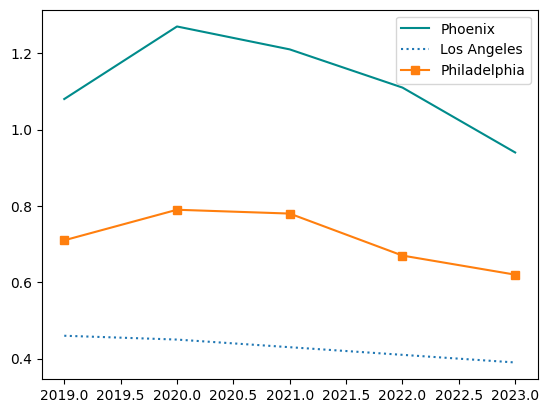

In [7]:
#import
data = pd.read_csv('data.csv')
# Change the color of Phoenix to `"DarkCyan"`
plt.plot(data["Year"], data["Phoenix Police Dept"], label="Phoenix", color="DarkCyan")

# Make the Los Angeles line dotted
plt.plot(data["Year"], data["Los Angeles Police Dept"], label="Los Angeles", linestyle=':')

# Add square markers to Philedelphia
plt.plot(data["Year"], data["Philadelphia Police Dept"], label="Philadelphia", marker='s')

# Add a legend
plt.legend()

# Display the plot
plt.show()

## Identificación del secuestrador de Bayes
Hemos reducido los posibles secuestradores a dos sospechosos:

- Fred Frecuentista (suspect1)
- Gertrude Cox (suspect2)

El secuestrador dejó una larga nota de rescate que contenía varias frases inusuales. 

Usaremos un gráfico de líneas para comparar la frecuencia de las cartas en la nota de rescate con muestras de los dos sospechosos principales.

Cargamos tres DataFrames:

ransom (ya cargado) Contiene las frecuencias de las letras para la nota de rescate.
suspect1 contiene las frecuencias de letras para la muestra de Fred Frequentist.
suspect2 contiene las frecuencias de letras para la muestra de Gertrude Cox.
Cada DataFrame contiene dos columnas:  letter y frequency

In [8]:
suspect1 = pd.read_csv('suspect1.csv')
suspect2 = pd.read_csv('suspect2.csv')
print(suspect1.head())
print(suspect2.head())

   letter_index letter  frequency   identity
0             1      A       7.24  Suspect 1
1             2      B       0.01  Suspect 1
2             3      C       3.03  Suspect 1
3             4      D       4.04  Suspect 1
4             5      E      13.49  Suspect 1
   letter_index letter  frequency   identity
0             1      A      8.167  Suspect 2
1             2      B      1.492  Suspect 2
2             3      C      2.782  Suspect 2
3             4      D      4.253  Suspect 2
4             5      E     12.702  Suspect 2


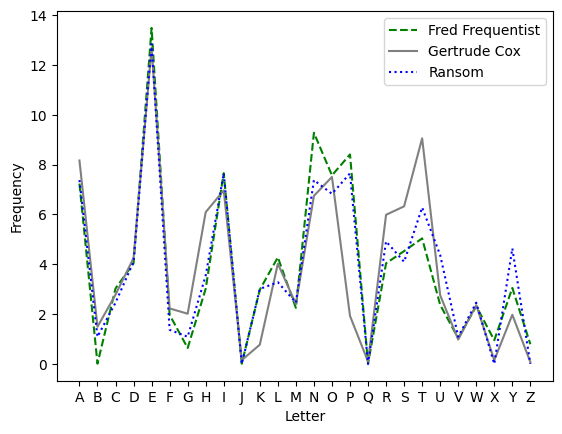

In [9]:
# Plot each line
plt.plot(suspect1.letter, suspect1.frequency, label='Fred Frequentist', linestyle='--', color='green')
plt.plot(suspect2.letter, suspect2.frequency, label='Gertrude Cox', linestyle='-', color='gray')

plt.plot(ransom.letter, ransom.frequency,
         label='Ransom', linestyle=':', color='blue')

# Add x- and y-labels
plt.xlabel("Letter")
plt.ylabel("Frequency")

# Add a legend
plt.legend()

# Display plot
plt.show()

## Trazar datos de teléfonos celulares
Sabemos que Freddy Frecuentista es quien secuestró a Bayes el Golden Retriever. Ahora tenemos que aprender dónde se esconde.

Nuestros amigos en la estación de policía han adquirido datos de teléfonos celulares, lo que da algunas de las ubicaciones de Freddie en las últimas tres semanas. Se almacenan en el DataFrame "cellphone".

In [13]:
cellphone = pd.read_csv('cellphone.csv')

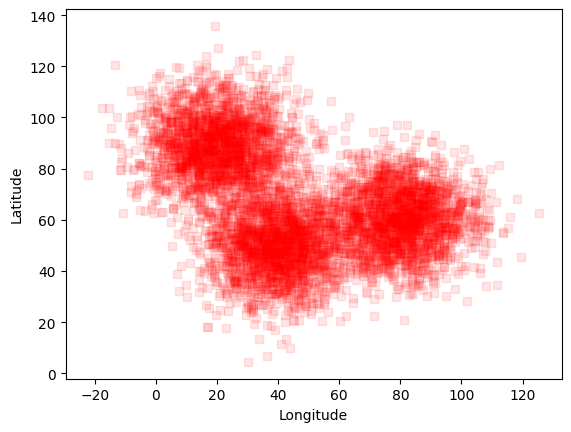

In [14]:
# Create a scatter plot of the data from the DataFrame cellphone
plt.scatter(cellphone.x, cellphone.y,
           color='red',
           marker='s',
           alpha=0.1)

# Add labels
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Display the plot
plt.show()

![scatter plot](scatter1.png)

## Héroes con histogramas
Necesitamos saber dónde Fred está escondiendo a Bayes.

Una huella de zapato en la escena del crimen contiene un tipo específico de grava. Basándonos en la distribución de los radios de grava, podemos determinar dónde visitó recientemente el secuestrador. Podría ser:

![Blue Meadows Park](blue_meadows_park.jpg)
![Shady Groves Campsite](shady_groves_campsite.jpg)
![Happy Mountain Trailhead](happy_mountain_trailhead.jpg)

Los radios de las piezas de grava individuales los cargaremos en el DataFrame bajo el alias "gravel"

In [11]:
gravel = pd.read_csv('gravel.csv')

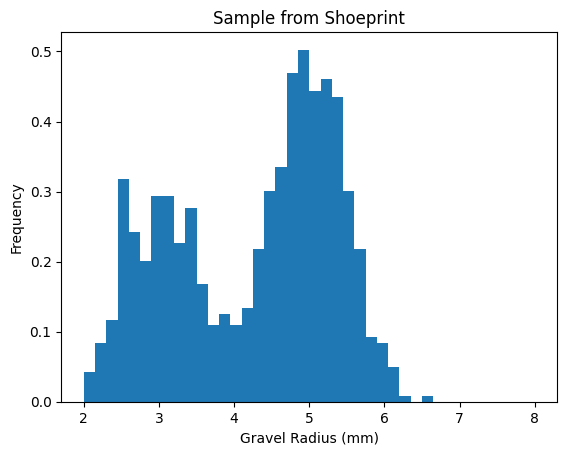

In [12]:
# Create a histogram
plt.hist(gravel.radius,
         bins=40,
         range=(2, 8),
         density=True)

# Label plot
plt.xlabel('Gravel Radius (mm)')
plt.ylabel('Frequency')
plt.title('Sample from Shoeprint')

# Display histogram
plt.show()

¡Lo tenemos! Freddy Frequentist secuestró a Bayes, el Golden Retriever y lo estaba escondiendo en el campamento Shady Groves.